# Setting up data

In [1]:
import HelperFunctions as hf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
import gc
gc.collect()

20

In [3]:
#Load in the raw data
calendar_df = hf.load_calendar_data()
prices_df = hf.load_sell_price_data()
sales_df = hf.load_sales_train_validation_data()

In [4]:
#Clean the raw data
df = hf.rawToClean(sales_df, calendar_df, prices_df, days=750, items=1000, dropNAPrices=True)

In [5]:
df = hf.rollingMeanDemandFeature(df, windowSize=7, shift=1) #Mean of previous week
df = hf.rollingMeanDemandFeature(df, windowSize=28, shift=1) #Mean of previous 28 days

In [6]:
df = hf.rollingMeanWeekday(df, weeks = 3, shift = 1) #mean of previous 3 weeks (for that particular weekday)

In [7]:
df = hf.lagFeature(df, var='sold', lag=1) #Amount sold day before
df = hf.lagFeature(df, var='sold', lag=7) #Amount sold a week before
df = hf.lagFeature(df, var='sold', lag=28) #Amount sold 28 days before

In [8]:
df.shape

(426984, 48)

In [9]:
df.head()

,id,d,sold,wday,month,year,snap_CA,snap_TX,snap_WI,sell_price,...,WI_3,CA,TX,WI,rolling_mean_7_1,rolling_mean_28_1,rolling_mean_3_1,sold_lag_1,sold_lag_7,sold_lag_28
0,FOODS_2_093_TX_2_validation,1,0,1,1,2011,0,0,0,2.48,...,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
1,FOODS_3_411_WI_3_validation,1,5,1,1,2011,0,0,0,2.98,...,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
6,HOUSEHOLD_1_129_CA_2_validation,1,4,1,1,2011,0,0,0,3.78,...,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,FOODS_2_139_CA_4_validation,1,7,1,1,2011,0,0,0,3.00,...,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
12,FOODS_2_399_CA_3_validation,1,0,1,1,2011,0,0,0,1.98,...,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.dropna()

In [11]:
df.head()

,id,d,sold,wday,month,year,snap_CA,snap_TX,snap_WI,sell_price,...,WI_3,CA,TX,WI,rolling_mean_7_1,rolling_mean_28_1,rolling_mean_3_1,sold_lag_1,sold_lag_7,sold_lag_28
28000,FOODS_2_093_TX_2_validation,29,2,1,2,2011,0,0,0,2.48,...,0,0,1,0,2.285714,2.321429,4.666667,0,6,0
28001,FOODS_3_411_WI_3_validation,29,2,1,2,2011,0,0,0,2.98,...,1,0,0,1,2.428571,2.785714,4.333333,3,6,5
28006,HOUSEHOLD_1_129_CA_2_validation,29,0,1,2,2011,0,0,0,3.78,...,0,1,0,0,2.428571,3.000000,3.000000,0,4,4
28009,FOODS_2_139_CA_4_validation,29,6,1,2,2011,0,0,0,3.00,...,0,1,0,0,5.714286,4.428571,4.000000,6,5,7
28012,FOODS_2_399_CA_3_validation,29,0,1,2,2011,0,0,0,1.98,...,0,1,0,0,2.000000,1.678571,0.666667,0,0,0


In [12]:
df.columns

Index(['id', 'd', 'sold', 'wday', 'month', 'year', 'snap_CA', 'snap_TX',
       'snap_WI', 'sell_price', 'Cultural', 'National', 'Religious',
       'Sporting', 'NoEvent', 'Christmas', 'weekend', 'midweek', 'monfri',
       'FOODS_1', 'FOODS_2', 'FOODS_3', 'HOBBIES_1', 'HOBBIES_2',
       'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS', 'HOBBIES', 'HOUSEHOLD', 'CA_1',
       'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3',
       'CA', 'TX', 'WI', 'rolling_mean_7_1', 'rolling_mean_28_1',
       'rolling_mean_3_1', 'sold_lag_1', 'sold_lag_7', 'sold_lag_28'],
      dtype='object')

In [13]:
df = df.drop("id", axis = 1)

In [14]:
df = df.sample(10_000)

In [14]:
target = df.pop("sold")

# random forest

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [17]:
target = target.astype(int)

In [16]:
X_train,X_test ,y_train,y_test = train_test_split(df.values, target.values,test_size=0.3)

In [19]:
print(df.shape, target.shape)

(10000, 46) (10000,)


In [20]:
X_train.shape, y_train.shape

((7000, 46), (7000,))

In [21]:
y_train.astype

<function ndarray.astype>

In [22]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [23]:
sel.get_support()

array([ True,  True,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True])

In [24]:
selected_feat= df.columns[(sel.get_support())]
len(selected_feat)

10

In [25]:
selected_feat

Index(['d', 'wday', 'month', 'sell_price', 'rolling_mean_7_1',
       'rolling_mean_28_1', 'rolling_mean_3_1', 'sold_lag_1', 'sold_lag_7',
       'sold_lag_28'],
      dtype='object')

# Lasso (feature selection)

In [17]:
df.head()

,d,wday,month,year,snap_CA,snap_TX,snap_WI,sell_price,Cultural,National,...,WI_3,CA,TX,WI,rolling_mean_7_1,rolling_mean_28_1,rolling_mean_3_1,sold_lag_1,sold_lag_7,sold_lag_28
28000,29,1,2,2011,0,0,0,2.48,0,0,...,0,0,1,0,2.285714,2.321429,4.666667,0,6,0
28001,29,1,2,2011,0,0,0,2.98,0,0,...,1,0,0,1,2.428571,2.785714,4.333333,3,6,5
28006,29,1,2,2011,0,0,0,3.78,0,0,...,0,1,0,0,2.428571,3.000000,3.000000,0,4,4
28009,29,1,2,2011,0,0,0,3.00,0,0,...,0,1,0,0,5.714286,4.428571,4.000000,6,5,7
28012,29,1,2,2011,0,0,0,1.98,0,0,...,0,1,0,0,2.000000,1.678571,0.666667,0,0,0


In [22]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

(0.0, 50.0)

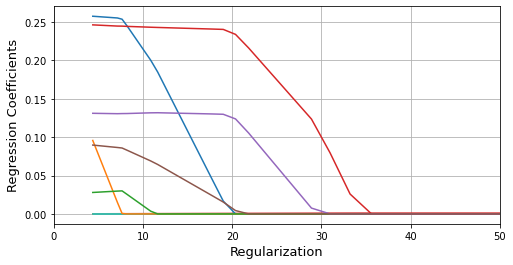

In [20]:
alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train)

fig, ax = plt.subplots(figsize = (8,4))
for i in range(X_train.shape[1]):
    ax.plot(alphas_lasso, coefs_lasso[i,:])
ax.grid(True)
ax.set_xlabel("Regularization",fontsize=13)
ax.set_ylabel("Regression Coefficients",fontsize=13)

ax.set_xlim(0,50)

Most important features: 
['d', 'month', 'snap_CA', 'snap_TX', 'snap_WI', 'sell_price', 'weekend', 'midweek', 'rolling_mean_7_1', 'rolling_mean_28_1', 'rolling_mean_3_1', 'sold_lag_1', 'sold_lag_7', 'sold_lag_28']



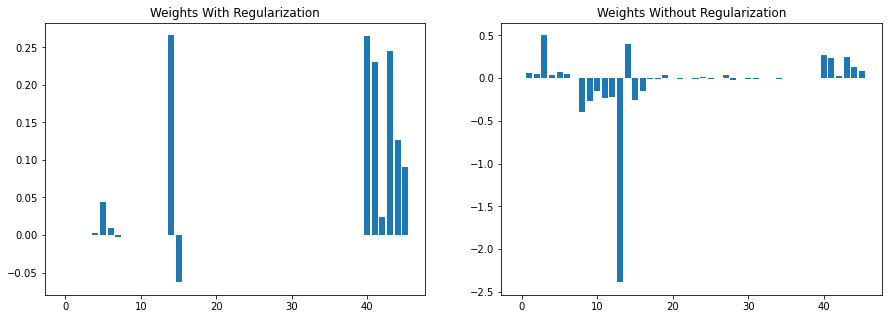

In [40]:
#With Regularization
lasso=Lasso(alpha=0.02)
lasso.fit(X_train,y_train)
w_lasso=lasso.coef_

#Without Regularization
lm=LinearRegression()
lm.fit(X_train,y_train)
w_lm=lm.coef_

fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].bar(np.arange(len(w_lasso)),w_lasso)
ax[0].set_title("Weights With Regularization")
ax[1].bar(np.arange(len(w_lm)),w_lm)
ax[1].set_title("Weights Without Regularization")

plt.show

important_features=[]
for i in range(len(w_lasso)):
    if w_lasso[i]!=0:
        important_features.append(df.columns[i])
    else:
        pass
    
print(f"Most important features: \n{important_features}\n")